In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from fnmatch import fnmatch


In [ ]:
from pathlib import Path
from fnmatch import fnmatch
import pandas as pd

root = (Path.cwd() / "apt_prices_poland")
if not root.exists():
    root = Path.cwd().parent / "apt_prices_poland"  

skip_pattern = "apartments_rent_pl_*.csv"

csv_paths = [
    path
    for path in root.rglob("*.csv")
    if not fnmatch(path.name, skip_pattern)
]

if not csv_paths:
    raise FileNotFoundError(f"No CSV files found under {root}")

frames = [pd.read_csv(p) for p in csv_paths]
combined = pd.concat(frames, ignore_index=True)



In [15]:
combined

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,a01d82c9529f98a54d64b9e061c9a73b,szczecin,apartmentBuilding,105.00,4.0,3.0,4.0,2016.0,53.431503,14.485820,...,0.335,condominium,brick,premium,no,yes,yes,no,no,1199999
1,d68ea84e5d35da9e282150332bdc22f3,szczecin,blockOfFlats,94.40,4.0,4.0,5.0,NaN,53.441253,14.511030,...,0.051,condominium,brick,premium,yes,yes,no,no,yes,1150000
2,420295cc23d693fdffd5ccc9ba35ba98,szczecin,NaN,48.29,2.0,8.0,11.0,2014.0,53.399444,14.526111,...,0.141,condominium,NaN,NaN,yes,yes,yes,no,yes,625000
3,7d0c31d5409caab173571cce3dcdf702,szczecin,blockOfFlats,68.61,3.0,4.0,4.0,1997.0,53.456213,14.583222,...,0.304,condominium,brick,NaN,no,yes,no,no,yes,550000
4,7ec72a2301d950ae17926c3c1e67a0ed,szczecin,tenement,35.92,2.0,NaN,NaN,NaN,53.424203,14.543550,...,0.329,condominium,brick,low,yes,no,no,no,no,299000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195563,5803d8594e9d69c558ae99bb07ccaca0,bydgoszcz,tenement,106.00,5.0,2.0,2.0,NaN,53.121506,17.994189,...,0.396,condominium,brick,NaN,no,yes,no,no,no,742000
195564,204c93689b7cdc62a17ef3c0dbf7034a,bydgoszcz,tenement,98.00,3.0,NaN,3.0,1925.0,53.124655,18.008459,...,0.273,condominium,brick,NaN,no,no,no,no,yes,499000
195565,bb19da639a2de8bba49be2ca49053c87,bydgoszcz,tenement,108.96,5.0,2.0,4.0,1889.0,53.131748,18.000648,...,0.143,condominium,brick,NaN,no,no,no,no,yes,795000
195566,1e7f4f1fdfea31eb84e071d697839632,bydgoszcz,NaN,50.12,2.0,1.0,1.0,NaN,53.129657,18.003888,...,0.250,condominium,brick,NaN,yes,no,no,no,no,360000


In [11]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195568 entries, 0 to 195567
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    195568 non-null  object 
 1   city                  195568 non-null  object 
 2   type                  153307 non-null  object 
 3   squareMeters          195568 non-null  float64
 4   rooms                 195568 non-null  float64
 5   floor                 160974 non-null  float64
 6   floorCount            193185 non-null  float64
 7   buildYear             163352 non-null  float64
 8   latitude              195568 non-null  float64
 9   longitude             195568 non-null  float64
 10  centreDistance        195568 non-null  float64
 11  poiCount              195568 non-null  float64
 12  schoolDistance        195400 non-null  float64
 13  clinicDistance        194840 non-null  float64
 14  postOfficeDistance    195320 non-null  float64
 15  

In [17]:
combined.dropna(inplace=True)

In [18]:
combined

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,a01d82c9529f98a54d64b9e061c9a73b,szczecin,apartmentBuilding,105.00,4.0,3.0,4.0,2016.0,53.431503,14.485820,...,0.335,condominium,brick,premium,no,yes,yes,no,no,1199999
5,9c833c02e8a2573bb7fb73f8ff835923,szczecin,blockOfFlats,81.00,4.0,4.0,4.0,1989.0,53.454167,14.529444,...,0.348,cooperative,brick,premium,yes,no,no,no,yes,729000
9,708aca718f1472307a06742b65d03925,szczecin,blockOfFlats,55.04,3.0,2.0,3.0,2013.0,53.468905,14.564983,...,1.052,condominium,brick,premium,yes,yes,no,no,no,649000
10,9a344c1a93d546d15cb8919e9382f2c0,szczecin,blockOfFlats,75.77,3.0,1.0,1.0,1895.0,53.432222,14.555833,...,0.121,condominium,brick,premium,no,no,no,no,yes,499000
13,24af7cc54099d7930535543827604a9d,szczecin,blockOfFlats,68.94,3.0,3.0,4.0,1950.0,53.414725,14.529634,...,0.721,condominium,brick,low,no,yes,no,no,yes,560000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195444,bf86208d7de4b636ee603c89195b2fe7,bydgoszcz,tenement,38.97,2.0,3.0,3.0,1899.0,53.124240,18.003030,...,0.045,condominium,brick,low,no,no,no,no,yes,239000
195465,8cf7f2af1dfbffd2c21b950bd70285f8,bydgoszcz,tenement,40.00,2.0,3.0,3.0,1930.0,53.123344,18.007987,...,0.389,condominium,brick,premium,no,no,no,no,no,349000
195498,c680a6e62ac3d7f8b2bf5dda5a802ddb,bydgoszcz,tenement,75.00,5.0,3.0,3.0,1887.0,53.125876,17.991736,...,0.459,condominium,brick,low,no,no,no,no,no,352500
195547,36112fd62a6c141ef83cdbca1b2c53a1,bydgoszcz,apartmentBuilding,71.72,3.0,1.0,2.0,2012.0,53.124984,18.049752,...,0.155,condominium,brick,premium,no,yes,yes,no,no,849000


In [23]:
from sklearn.model_selection import train_test_split

X = combined.drop(columns=["price"])
y = combined['price']

In [24]:
X

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
0,a01d82c9529f98a54d64b9e061c9a73b,szczecin,apartmentBuilding,105.00,4.0,3.0,4.0,2016.0,53.431503,14.485820,...,3.062,0.335,condominium,brick,premium,no,yes,yes,no,no
5,9c833c02e8a2573bb7fb73f8ff835923,szczecin,blockOfFlats,81.00,4.0,4.0,4.0,1989.0,53.454167,14.529444,...,1.322,0.348,cooperative,brick,premium,yes,no,no,no,yes
9,708aca718f1472307a06742b65d03925,szczecin,blockOfFlats,55.04,3.0,2.0,3.0,2013.0,53.468905,14.564983,...,1.129,1.052,condominium,brick,premium,yes,yes,no,no,no
10,9a344c1a93d546d15cb8919e9382f2c0,szczecin,blockOfFlats,75.77,3.0,1.0,1.0,1895.0,53.432222,14.555833,...,0.501,0.121,condominium,brick,premium,no,no,no,no,yes
13,24af7cc54099d7930535543827604a9d,szczecin,blockOfFlats,68.94,3.0,3.0,4.0,1950.0,53.414725,14.529634,...,0.583,0.721,condominium,brick,low,no,yes,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195444,bf86208d7de4b636ee603c89195b2fe7,bydgoszcz,tenement,38.97,2.0,3.0,3.0,1899.0,53.124240,18.003030,...,0.510,0.045,condominium,brick,low,no,no,no,no,yes
195465,8cf7f2af1dfbffd2c21b950bd70285f8,bydgoszcz,tenement,40.00,2.0,3.0,3.0,1930.0,53.123344,18.007987,...,0.329,0.389,condominium,brick,premium,no,no,no,no,no
195498,c680a6e62ac3d7f8b2bf5dda5a802ddb,bydgoszcz,tenement,75.00,5.0,3.0,3.0,1887.0,53.125876,17.991736,...,0.286,0.459,condominium,brick,low,no,no,no,no,no
195547,36112fd62a6c141ef83cdbca1b2c53a1,bydgoszcz,apartmentBuilding,71.72,3.0,1.0,2.0,2012.0,53.124984,18.049752,...,0.861,0.155,condominium,brick,premium,no,yes,yes,no,no


In [25]:
y

0         1199999
5          729000
9          649000
10         499000
13         560000
           ...   
195444     239000
195465     349000
195498     352500
195547     849000
195558     599000
Name: price, Length: 23427, dtype: int64

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [27]:
train_data= X_train.join(y_train)

In [28]:
train_data

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
15833,98fde9f9b0ba51d5cccdfd3c64230ae5,bydgoszcz,blockOfFlats,42.42,3.0,10.0,11.0,1975.0,53.108100,18.033900,...,0.146,condominium,concreteSlab,premium,no,no,yes,no,no,365000
69619,dad59b4143f232eea5d89414fa96ad08,krakow,apartmentBuilding,74.00,3.0,2.0,2.0,2012.0,50.100521,19.961728,...,0.241,condominium,brick,premium,yes,yes,no,no,no,910000
13777,90a89b0aeb4e538e81fe460ebdaaf0bd,warszawa,apartmentBuilding,37.58,2.0,12.0,12.0,2012.0,52.174981,20.999010,...,0.100,condominium,brick,premium,no,yes,yes,no,no,860000
61707,8db66e17e4ecee7d1f7c33c4fc627488,warszawa,tenement,84.10,3.0,3.0,3.0,1938.0,52.261236,20.997416,...,0.290,condominium,brick,low,yes,yes,no,no,yes,1849000
163684,5541f2ab6634de17cc735be63b2f892a,wroclaw,blockOfFlats,42.00,2.0,5.0,5.0,1990.0,51.109271,17.023133,...,0.215,condominium,brick,premium,no,no,no,no,yes,579000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87182,26da9754572c7b4329dfea7db78b8982,bialystok,blockOfFlats,70.00,3.0,4.0,4.0,2010.0,53.113333,23.145833,...,0.105,condominium,brick,premium,no,yes,no,no,yes,599000
112979,b197bb4722c032ae086f0a86924796eb,warszawa,apartmentBuilding,83.00,3.0,2.0,4.0,1996.0,52.225000,21.104800,...,0.055,cooperative,brick,low,yes,yes,no,yes,yes,910000
148778,6af28ae344be8baef8ca471afaafcd55,warszawa,apartmentBuilding,31.00,1.0,2.0,6.0,2024.0,52.252266,21.068776,...,0.288,condominium,brick,premium,yes,yes,yes,no,no,680000
181802,861ec3c4228c38a95aa5531ecfbd602f,gdansk,tenement,56.60,2.0,1.0,3.0,1910.0,54.355600,18.656200,...,0.328,condominium,brick,low,no,no,no,no,yes,720000


array([[<Axes: title={'center': 'squareMeters'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'floorCount'}>],
       [<Axes: title={'center': 'buildYear'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'centreDistance'}>],
       [<Axes: title={'center': 'poiCount'}>,
        <Axes: title={'center': 'schoolDistance'}>,
        <Axes: title={'center': 'clinicDistance'}>,
        <Axes: title={'center': 'postOfficeDistance'}>],
       [<Axes: title={'center': 'kindergartenDistance'}>,
        <Axes: title={'center': 'restaurantDistance'}>,
        <Axes: title={'center': 'collegeDistance'}>,
        <Axes: title={'center': 'pharmacyDistance'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

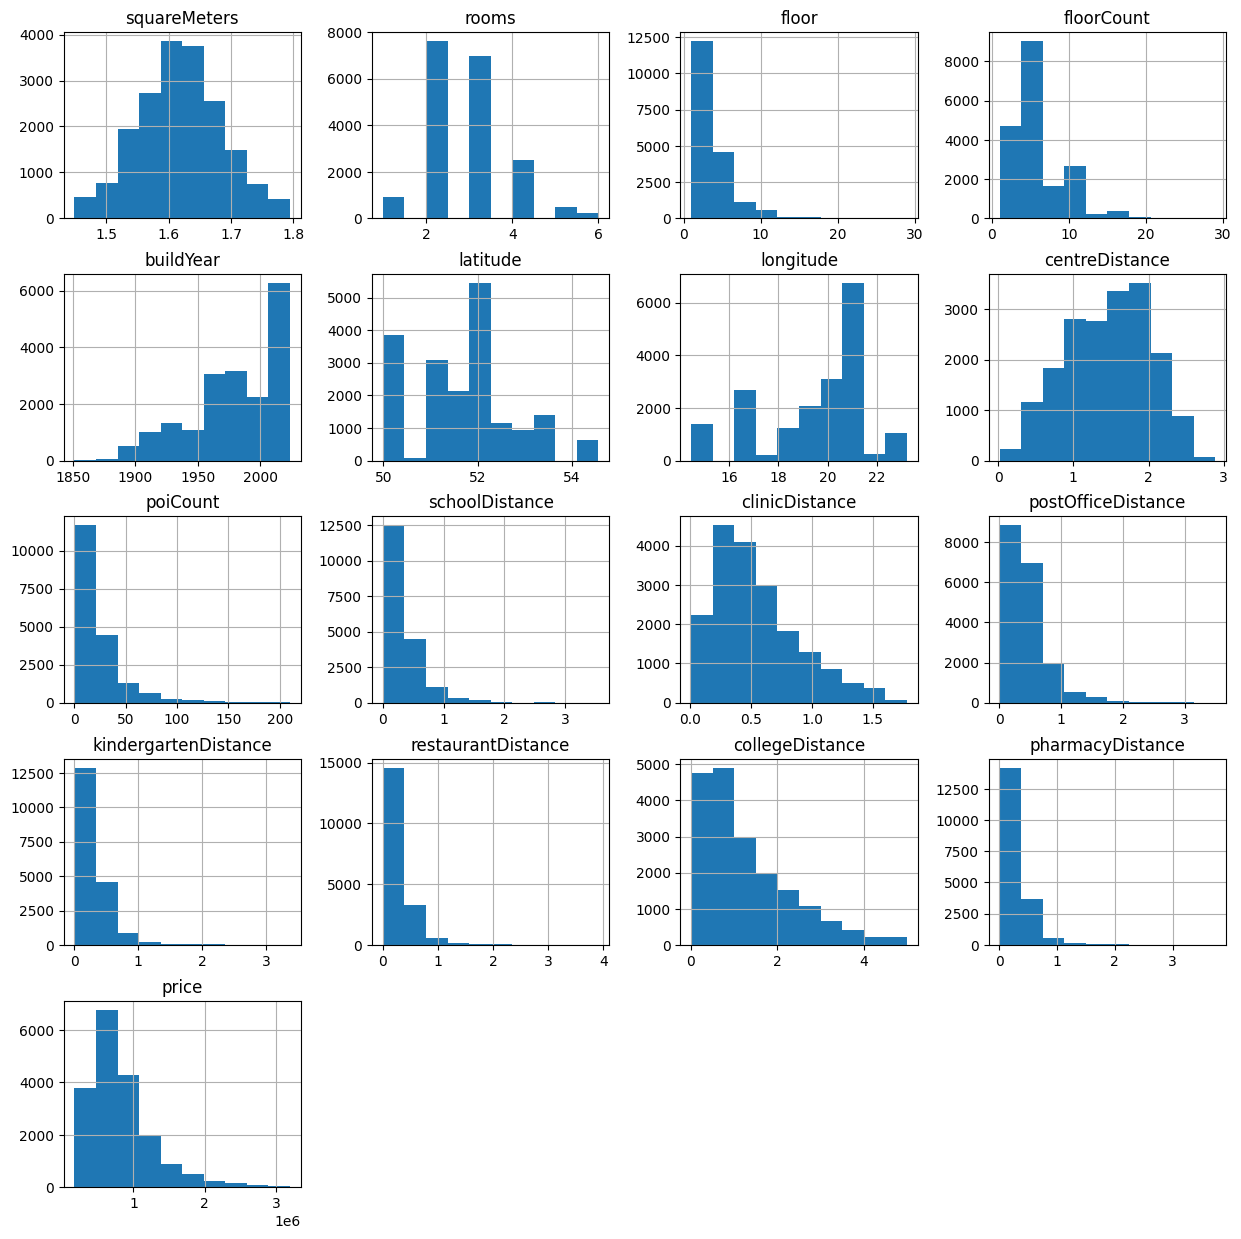

In [42]:
train_data.hist(figsize=(15,15))

<Axes: >

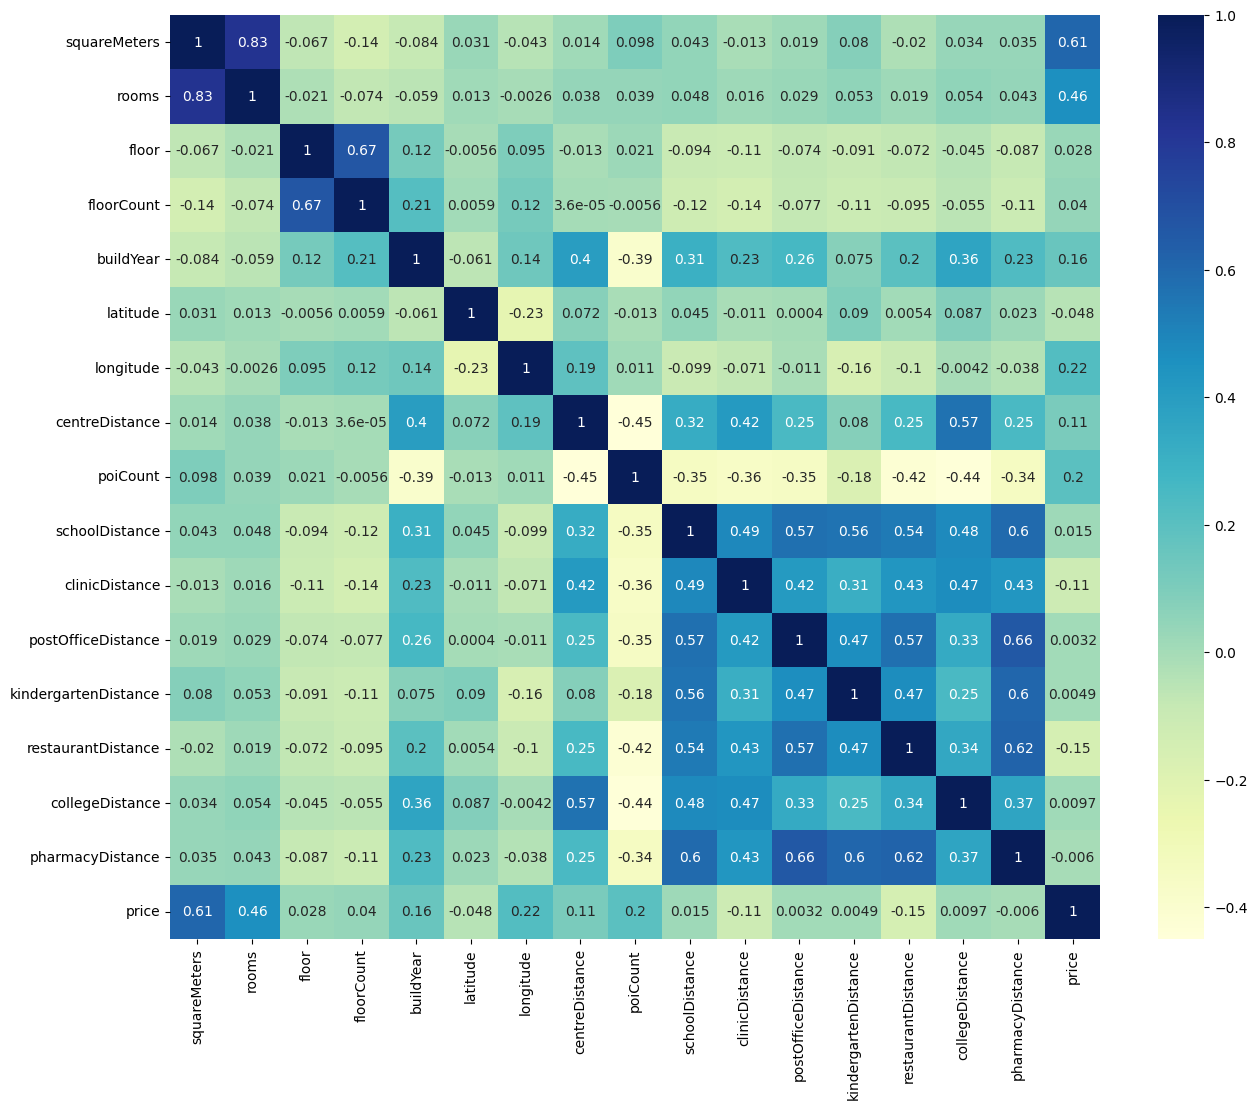

In [38]:
plt.figure(figsize=(15,12))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [41]:
train_data['squareMeters'] = np.log(train_data['squareMeters']+1)
train_data['centreDistance'] = np.log(train_data['centreDistance']+1)
train_data['clinicDistance'] = np.log(train_data['clinicDistance']+1)

In [43]:
train_data.hasParkingSpace.value_counts()

hasParkingSpace
no     10740
yes     8001
Name: count, dtype: int64

In [44]:
train_data.buildingMaterial.value_counts()

buildingMaterial
brick           13969
concreteSlab     4772
Name: count, dtype: int64

In [45]:
train_data.condition.value_counts()

condition
premium    11390
low         7351
Name: count, dtype: int64

In [46]:
train_data.type.value_counts()

type
blockOfFlats         8822
apartmentBuilding    5844
tenement             4075
Name: count, dtype: int64

In [47]:
pd.get_dummies(train_data.type)

,apartmentBuilding,blockOfFlats,tenement
15833,False,True,False
69619,True,False,False
13777,True,False,False
61707,False,False,True
163684,False,True,False
...,...,...,...
87182,False,True,False
112979,True,False,False
148778,True,False,False
181802,False,False,True


In [49]:
train_data= train_data.join(pd.get_dummies(train_data.type)).drop(['type'],axis=1)

<Axes: >

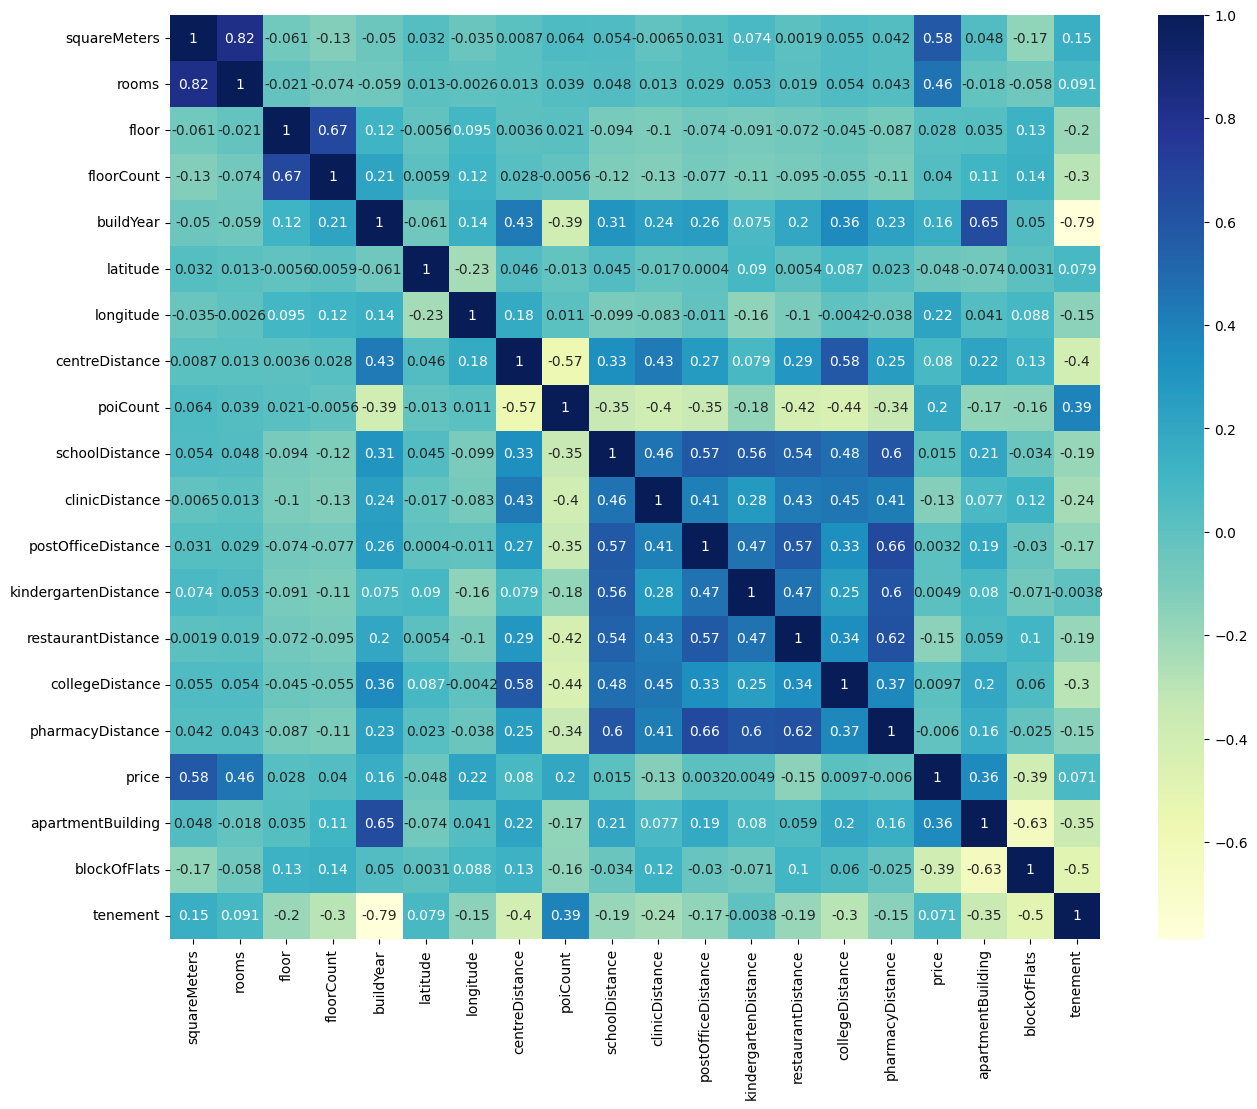

In [50]:
plt.figure(figsize=(15,12))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

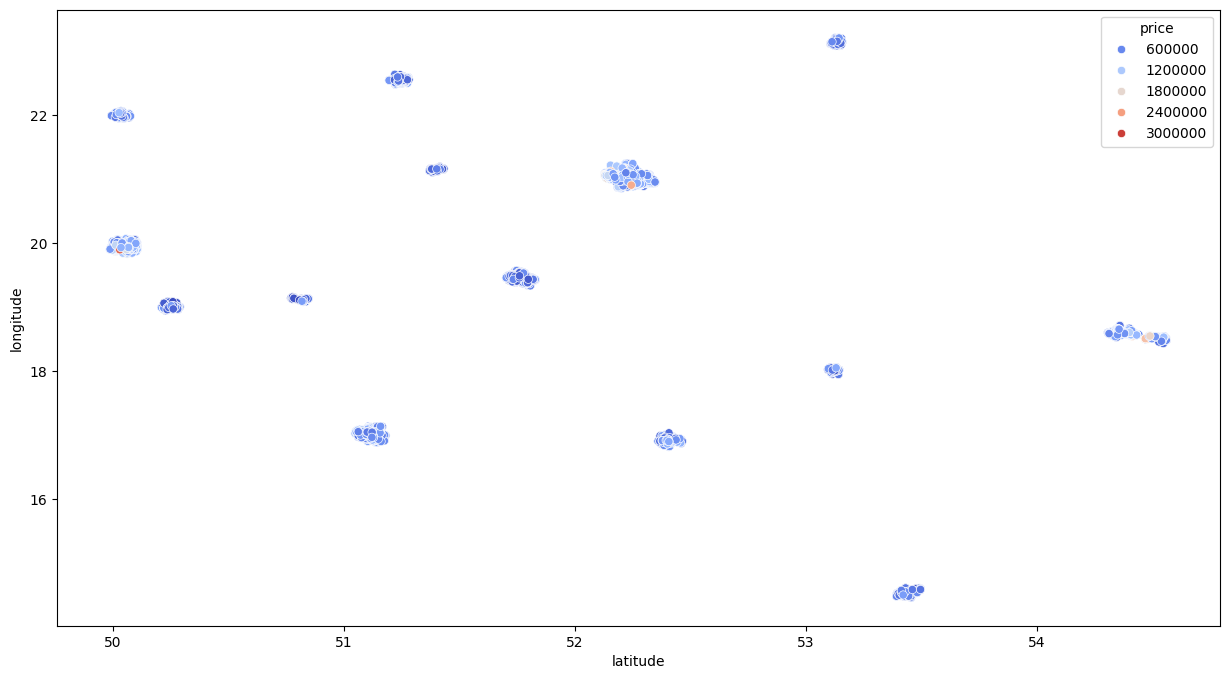

In [ ]:
# All region in Poland
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="price",palette="coolwarm")

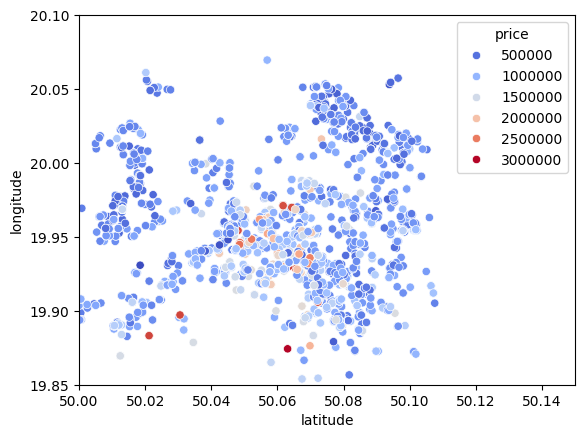

In [55]:
krakow = train_data.query("50.0 <= latitude <= 50.15 and 19.85 <= longitude <= 20.10")

sns.scatterplot(
    data=krakow,
    x="latitude",
    y="longitude",
    hue="price",
    palette="coolwarm",
)
plt.xlim(50.0, 50.15)
plt.ylim(19.85, 20.10)
plt.show()
